### Q2

In [12]:
import kagglehub
import os
import pandas as pd


path = kagglehub.dataset_download("uciml/iris")
path = f"{path}/{[f for f in os.listdir(path) if '.csv' in f][0]}"
data = pd.read_csv(path)

In [13]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
data = data.drop('Id', axis=1)

In [15]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('Species', axis=1)
y = data[['Species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

# must only fit on training data
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=3)
knn.fit(X_train, y_train)

c:\dev\miniconda\envs\faiac\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=3)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
mat

1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

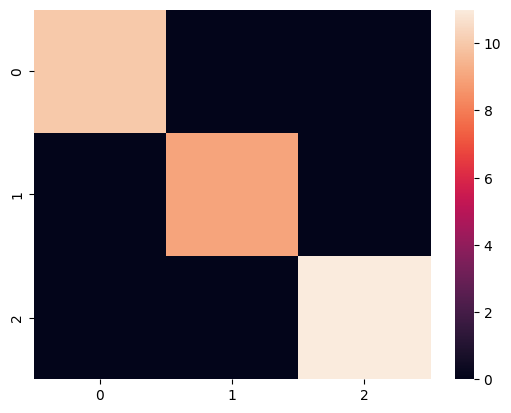

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(mat)
plt.show()